In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import norm


$\text{Defining the Variables}$

In [ ]:
gridsize=(100,100)
windowsize=(5,5)
noise_sigma=0.5
avg_pileup=5#per cell
p_signal=0.01

pileup_mu=140
t_sigma=1
E_pileup=2
E_electron = 50.0
E_jet   = 50.0


In [ ]:
energy_grid=np.zeros(gridsize)
time_grid=np.zeros(gridsize)

Mean noise energy $\mu_noise$ = 0.0018 GeV
Noise RMS $\sigma_noise^E$ = 0.4980 GeV


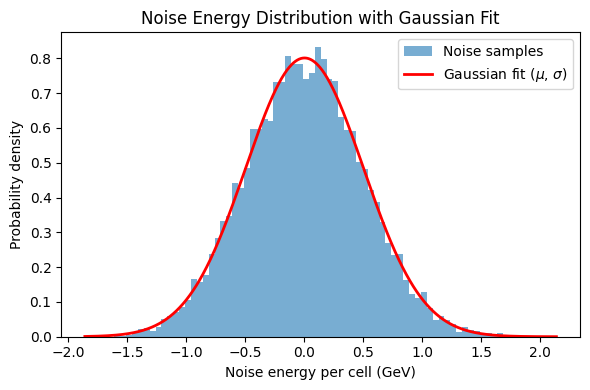

In [ ]:
noise=np.random.normal(0,noise_sigma,gridsize)

#Validating the generation of Noise through Gaussian fit
noise_samples = noise.flatten()

mu_noise, sigma_noise_E = norm.fit(noise_samples)

print(rf"Mean noise energy $\mu_noise$ = {mu_noise:.4f} GeV")
print(rf"Noise RMS $\sigma_noise^E$ = {sigma_noise_E:.4f} GeV")


plt.figure(figsize=(6, 4))

counts, bins,_ = plt.hist(noise_samples,bins=80,density=True,alpha=0.6,label="Noise samples")


x = np.linspace(bins[0], bins[-1], 1000)
pdf = norm.pdf(x, mu_noise, sigma_noise_E)


plt.plot(x,pdf,'r-',linewidth=2,label=r"Gaussian fit ($\mu$, $\sigma$)"
)


plt.xlabel("Noise energy per cell (GeV)")
plt.ylabel("Probability density")
plt.title("Noise Energy Distribution with Gaussian Fit")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def pileup_grid():
    n_pileup=np.random.poisson(pileup_mu)
    pileup_grid=np.zeros(gridsize)
    for _ in range(n_pileup):
        x=np.random.randint(0,gridsize[0])
        y=np.random.randint(0,gridsize[1])
        E_pileup=np.random.uniform(0,avg_pileup)
        pileup_grid[x,y]+=E_pileup
    return pileup_grid


In [ ]:
def spatial_signal_grid():
    p_event=np.random.binomial(n=1,p=p_signal)
    p_electron=np.random.binomial(n=1,p=0.3)

    current_pileup_grid=pileup_grid()
    background_grid=noise+current_pileup_grid

    if p_event==1:
        x0=np.random.randint(0,gridsize[0])
        y0=np.random.randint(0,gridsize[1])
        X,Y=np.meshgrid(np.arange(gridsize[0]),np.arange(gridsize[1]))
        dist=(X-x0)**2+(Y-y0)**2

        if p_electron==1:
            sigma=3
            E_true=np.random.exponential(E_electron)


        else:
            sigma=9
            E_true=np.random.normal(E_jet,5)

        shape=np.exp(-dist/(2*sigma**2))
        expE=E_true*shape
        signal=np.random.poisson(expE)
        signal_grid=np.zeros(gridsize)+signal
        energy_grid=background_grid+signal



    else:
        energy_grid=background_grid
        signal_grid=np.zeros(gridsize)
        E_true=0

    if p_event==1 and p_electron==1:
        signal_type=1
    elif p_event==1 and p_electron==0:
        signal_type=2
    else:
        signal_type=0

    return (energy_grid,signal_grid,current_pileup_grid,background_grid,signal_type,E_true,)


spatial_data=spatial_signal_grid()
E_signal_grid=spatial_data[1]
E_total_grid=spatial_data[0]
E_pileup_grid=spatial_data[2]
bg_grid=spatial_data[3]
signal_type=spatial_data[4]

In [ ]:
a=75
b=25
E_min=5*(sigma_noise_E)



def time_signal_grid(spatial_data):


    E_signal_grid=spatial_data[1]
    E_total_grid=spatial_data[0]
    E_pileup_grid=spatial_data[2]

    t=np.zeros(gridsize)
    t_mean=np.zeros(gridsize)
    t0=np.zeros(gridsize)
    t_sigma=np.zeros(gridsize)
    stochastic=np.zeros(gridsize)



    stochastic = a/np.sqrt(E_total_grid+E_min)
    constt=b
    t_sigma+=np.sqrt((stochastic)**2+constt**2)

    sigma_pileup=190
    t_pileup=np.random.normal(0,sigma_pileup,gridsize)
    t_mean=(E_signal_grid*t0+E_pileup_grid*t_pileup)/(E_total_grid+E_min)

    t+=np.random.normal(t_mean,t_sigma)

    time_grid=t
    return (time_grid,t_sigma)


In [ ]:
time_data=time_signal_grid(spatial_data)
t_grid=time_data[0]
sigma_t=time_data[1]
E_total_array=E_total_grid.flatten()
mask=E_total_array>E_min

In [ ]:
if signal_type==1:
    signal="Electromagnetic Shower"
elif signal_type==2:
    signal="Hadron Shower"
else:
    signal="No signal"

In [ ]:
energy_all=[]
time_all=[]
t_sigma_all=[]
EandT_all=[]


for _ in range(300):

    E_data=spatial_signal_grid()
    E_array=E_data[0].flatten()
    t_array=time_signal_grid(E_data)[0].flatten()
    t_sigma_array=time_signal_grid(E_data)[1].flatten()

    current_mask=E_array>E_min

    energy_all.extend(E_array[current_mask])
    time_all.extend(t_array[current_mask])
    EandT_all.extend(zip(E_array,t_array))
    t_sigma_all.extend(t_sigma_array[current_mask])

EandT=np.array(EandT_all)

$\text{Signal Plots : set p_signal = 1 and run the code}$

Text(0.5, 1.0, 'No signal Signal vs. Backgroud Energy Distributions')

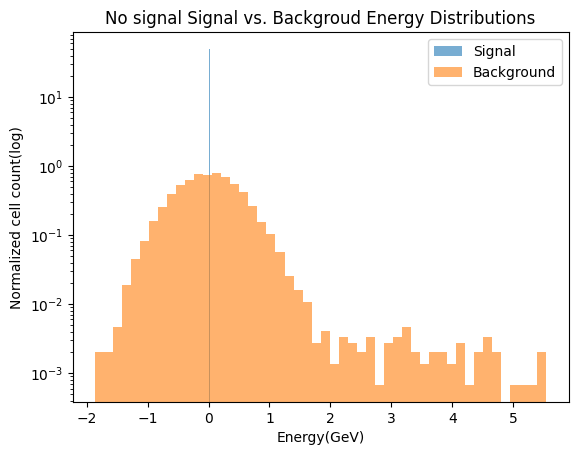

In [ ]:
#For the signal graph, set p_signal as 1 and run the code
plt.hist(E_signal_grid.flatten(),density=True,alpha=0.6,bins=50,label='Signal')
plt.hist(bg_grid.flatten(),density=True,alpha=0.6,bins=50,label='Background')
plt.yscale("log")
plt.ylabel("Normalized cell count(log)")
plt.xlabel("Energy(GeV)")
plt.legend()
plt.title(f"{signal} Signal vs. Backgroud Energy Distributions")

/tmp/ipython-input-1662410137.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0, hspace=0)


Text(0.5, 0.98, 'No signal Signal')

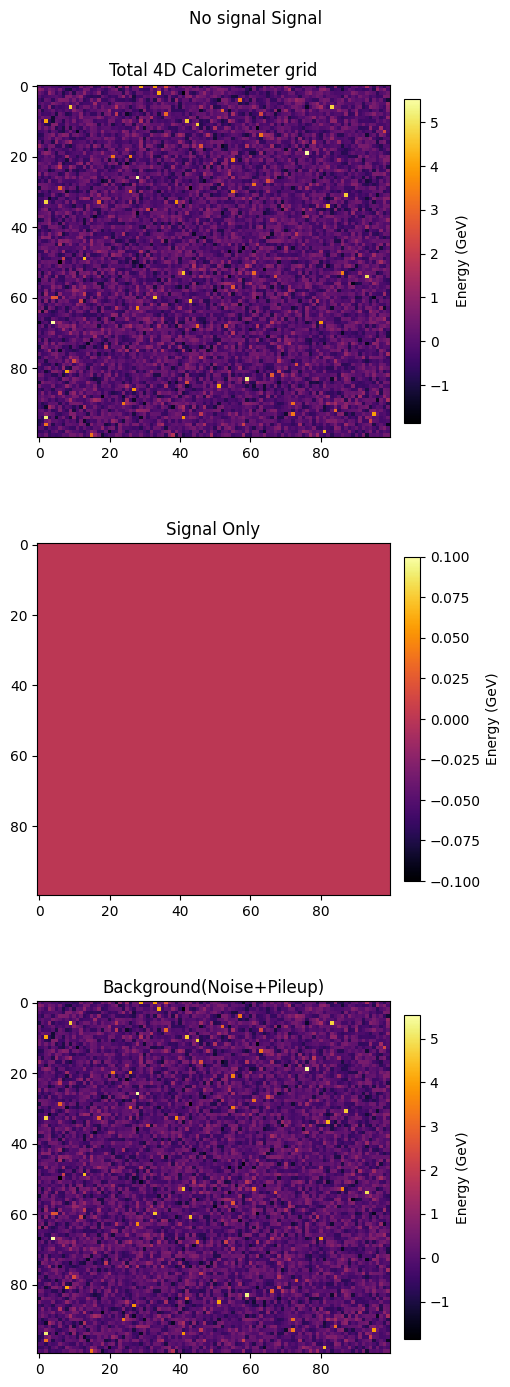

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(5,14),constrained_layout=True)
im1=axs[0].imshow(E_total_grid,cmap='inferno')
axs[0].set_title("Total 4D Calorimeter grid")

plt.colorbar(im1,fraction=0.046, pad=0.04, ax=axs[0], label='Energy (GeV)')

im2=axs[1].imshow(E_signal_grid,cmap='inferno')
axs[1].set_title("Signal Only")

plt.colorbar(im2, fraction=0.046, pad=0.04,ax=axs[1], label='Energy (GeV)')

im3=axs[2].imshow(bg_grid,cmap='inferno')
axs[2].set_title("Background(Noise+Pileup)")

plt.colorbar(im3,fraction=0.046, pad=0.04 ,ax=axs[2], label='Energy (GeV)')


plt.subplots_adjust(wspace=0, hspace=0)

plt.suptitle(f"{signal} Signal")



$\text{Multi-event Plots}$

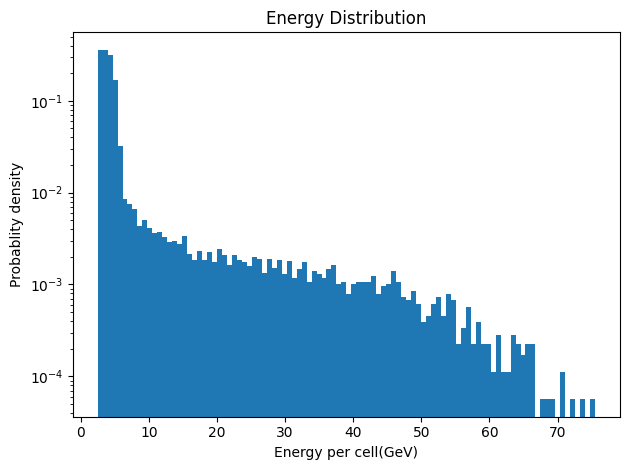

In [ ]:
plt.hist(energy_all,bins=100,density=True)
plt.yscale('log')
plt.xlabel("Energy per cell(GeV)")
plt.ylabel("Probablity density")
plt.title("Energy Distribution")
plt.tight_layout()
plt.show()

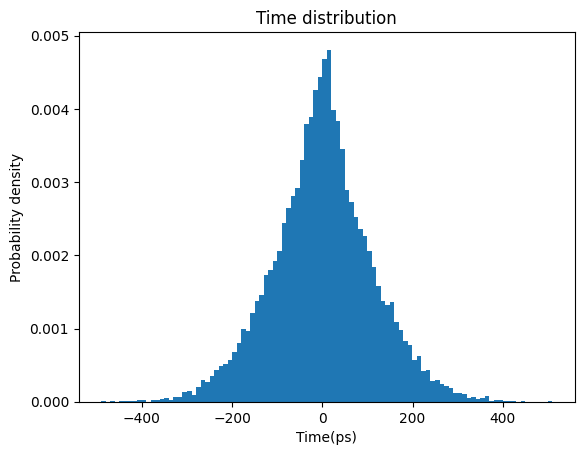

In [ ]:
plt.hist(time_all,bins=100,density=True)
plt.xlabel("Time(ps)")
plt.ylabel("Probability density")
plt.title("Time distribution")
plt.show()

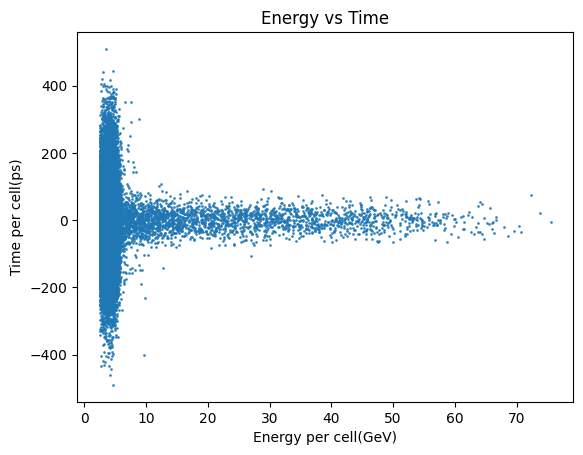

In [ ]:
plt.scatter(energy_all,time_all,alpha=0.8,s=1)
plt.xlabel("Energy per cell(GeV)")
plt.ylabel("Time per cell(ps)")
plt.title("Energy vs Time")
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2895166258.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(E_centers, sigma_t, 'o-', label='Extracted $\sigma_t(E)$')


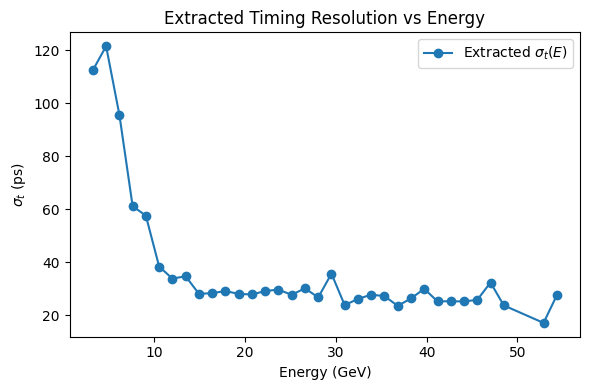

In [ ]:

E = EandT[:, 0]
t = EandT[:, 1]


mask = E > E_min
E = E[mask]
t = t[mask]


n_bins = 50
E_bins = np.linspace(E.min(), E.max(), n_bins + 1)

E_centers = []
sigma_t = []


for i in range(n_bins):
    in_bin = (E >= E_bins[i]) & (E < E_bins[i+1])

    if np.sum(in_bin) > 20:
        E_centers.append(0.5 * (E_bins[i] + E_bins[i+1]))
        sigma_t.append(np.std(t[in_bin]))

E_centers = np.array(E_centers)
sigma_t = np.array(sigma_t)


plt.figure(figsize=(6,4))
plt.plot(E_centers, sigma_t, 'o-', label='Extracted $\sigma_t(E)$')

plt.xlabel("Energy (GeV)")
plt.ylabel(r"$\sigma_t$ (ps)")
plt.title("Extracted Timing Resolution vs Energy")
plt.legend()
plt.tight_layout()
plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-904320686.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(E_theory,theory_line,'r--',label="$\sqrt{(75/\sqrt{E})^2+25^2}$")
/tmp/ipython-input-904320686.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Time resolution $\sigma_t$ (ps)")


Text(0.5, 1.0, 'Calorimeter Timing Resolution: Simulation vs. Design Specification')

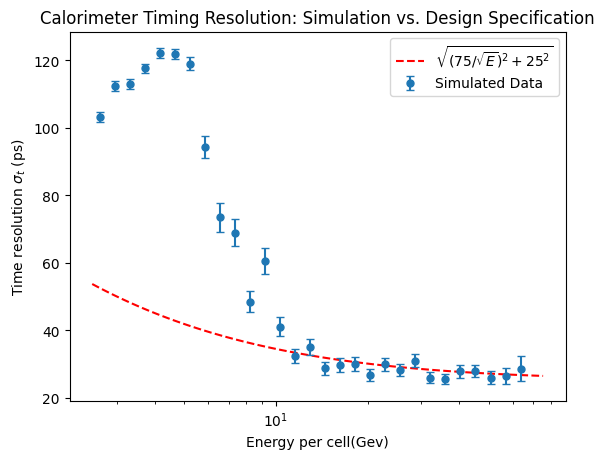

In [ ]:
n_bins=30
Emin=E_min
Emax=np.max(energy_all)
bins=np.logspace(np.log10(Emin),np.log10(Emax),n_bins+1)


E_centers=[]
sigma_t_ext=[]
sigma_t_err=[]

for i in range(n_bins):
    in_bin=(np.array(energy_all)>=bins[i])&(np.array(energy_all)<bins[i+1])
    bin_data=np.array(time_all)[in_bin]
    if len(bin_data)>10:
        res=np.std(bin_data)
        sigma_t_ext.append(res)
        E_centers.append(np.sqrt(bins[i]*bins[i+1]))
        sigma_t_err.append(res/np.sqrt(2*len(bin_data)))

E_theory=np.logspace(np.log10(Emin),np.log10(Emax),100)
theory_line=np.sqrt((a/np.sqrt(E_theory))**2+b**2)

plt.plot(E_theory,theory_line,'r--',label="$\sqrt{(75/\sqrt{E})^2+25^2}$")
plt.errorbar(E_centers,sigma_t_ext,yerr=sigma_t_err,label="Simulated Data",fmt='o',capsize=3, markersize=5)
plt.xscale("log")
plt.xlabel("Energy per cell(Gev)")
plt.ylabel("Time resolution $\sigma_t$ (ps)")
plt.legend()
plt.title("Calorimeter Timing Resolution: Simulation vs. Design Specification")



